In [181]:
from aocd import get_data

YEAR = 2022
DAY = 16

dat = get_data(day=DAY,year=YEAR)

with open('input/16','w') as f:
    f.write(dat)

f.close()

In [182]:
import regex as re

with open('input/16') as f:
    dat = f.read().split('\n')

valves = dict()
flows = dict()
for l in dat:
    v = re.findall('[A-Z]{2}',l)
    
    flows[v[0]] = [int(i) for i in re.findall('\d+',l)][0]
    valves[v[0]] = v[1:]

# print(flows)
# print(valves)



In [183]:
import networkx as nx

G = nx.Graph()

for v in valves.keys():
    for e in valves[v]:
        G.add_edge(v,e,weight = 1)



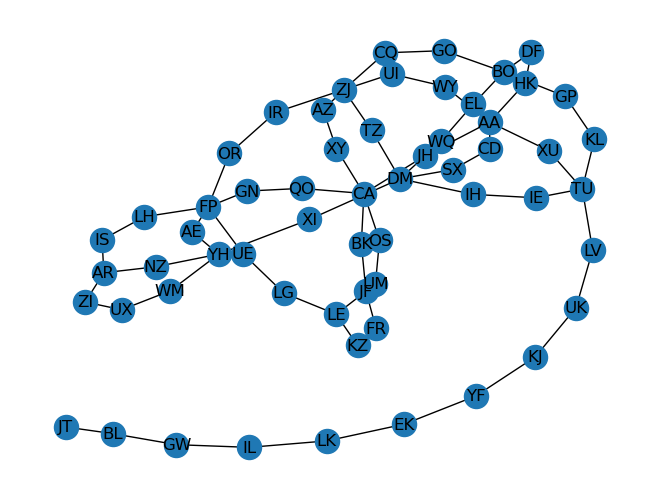

In [184]:
import matplotlib.pyplot as plt

nx.draw(G,with_labels = True)


In [185]:
import itertools
empty = []
for n in G.nodes:
    if(flows[n] == 0 and n!='AA'):
        empty.append(n)
        # print(f'node {n} is empty, removing.')
        l = G.edges(n)
        connections = [j for i,j in l]
        for p in list(itertools.combinations(connections,2)):
            # print(f'adding node between {p[0]} and {p[1]} with weight { G.get_edge_data(n,p[0])["weight"] + G.get_edge_data(n,p[1])["weight"]}')
            if(G.has_edge(p[0],p[1])):
                G.add_edge(p[0],p[1],weight = min(G.get_edge_data(p[0],p[1])['weight'],G.get_edge_data(n,p[0])['weight'] + G.get_edge_data(n,p[1])['weight'] ))
            else:
                G.add_edge(p[0],p[1],weight = G.get_edge_data(n,p[0])['weight'] + G.get_edge_data(n,p[1])['weight'] )
G.remove_nodes_from(empty)

{('ZJ', 'DM'): Text(-0.9619397521018982, -0.19134177168341893, '2'),
 ('ZJ', 'FP'): Text(-0.8535533547401428, -0.35355348785849827, '3'),
 ('ZJ', 'BO'): Text(-0.4999999940375597, -0.5000000437113883, '3'),
 ('ZJ', 'AA'): Text(-0.6913417875766754, -0.4619397660109641, '3'),
 ('ZJ', 'CA'): Text(-0.3086582124233246, -0.4619397660109641, '3'),
 ('DM', 'AA'): Text(-0.6532815396785736, -0.6532814502716064, '3'),
 ('DM', 'TU'): Text(-0.6532816886901855, 0.2705979347229004, '3'),
 ('DM', 'BO'): Text(-0.4619397461394579, -0.6913417279720306, '3'),
 ('DM', 'YH'): Text(-0.46193992098501724, 0.30865827202796936, '2'),
 ('FP', 'AR'): Text(2.9802322387695312e-08, -5.960464477539063e-08, '3'),
 ('FP', 'CA'): Text(-0.1622115671634674, -0.8154931664466858, '3'),
 ('FP', 'LE'): Text(0.10838642716407776, -0.5448951572179794, '3'),
 ('FP', 'YH'): Text(-0.35355352362326187, 0.14644655585289001, '2'),
 ('AA', 'TU'): Text(-0.38268372416496277, -5.960464477539063e-08, '2'),
 ('AA', 'CA'): Text(0.0, -0.9238794

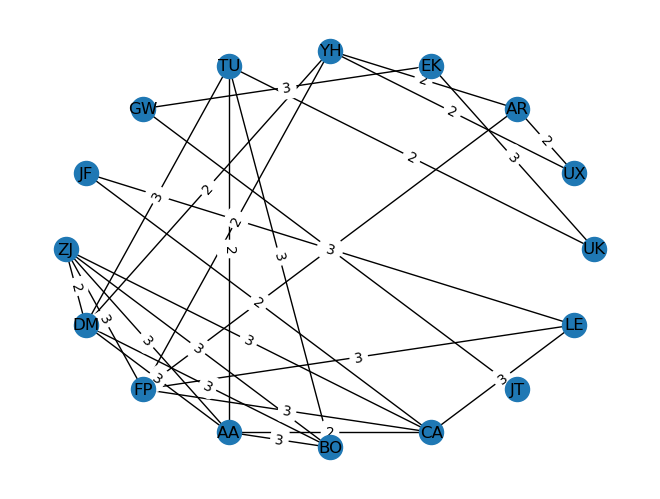

In [186]:
pos=nx.shell_layout(G)
nx.draw(G,pos,with_labels = True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)


In [187]:
G.edges('DD')

EdgeDataView([])